# ФИО студента: Шатов Дмитрий Вадимович

# Номер группы: 18-ИВТ-2

# Вариант: 24

# Задание: MPG


1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
6.	Заполните пропущенные значения в данных;
7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

# 1 пункт
Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных

1. <b>mpg</b> - сколько миль проедет ваша машина на галлоне топлива
2. <b>cylinders</b> - цилиндры
3. <b>displacement</b> - смещение
4. <b>horsepower</b> - лошадиная сила
5. <b>weight</b> - вес
6. <b>acceleration</b> - ускорение
7. <b>model year</b> - модельный год
8. <b>origin</b> - происхождение
9. <b>car name</b> - имя автомобиля

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr

MPG = 'mpg'
CYLYNDERS = 'cylinders'
DISPLACEMENT = 'displacement'
HORSEPOWER = 'horsepower'
WEIGHT = 'weight'
ACCELERATION = 'acceleration'
MODEL_YEAR = 'model year'
ORIGIN = 'origin'
CAR_NAME = 'car name'

df = pd.read_csv('auto-mpg.data.txt')
df_pandas = pd.DataFrame(df)
df_pandas.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# 2 пункт
Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [40]:
print("До удаления дубликатов:", df_pandas.shape)
df_pandas = df_pandas.drop_duplicates()
print("После удаления дубликатов:", df_pandas.shape)

До удаления дубликатов: (392, 9)
После удаления дубликатов: (392, 9)


# 3 пункт
Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

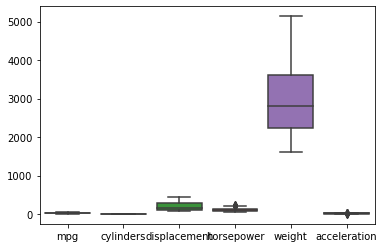

In [46]:
quan_atrib = [MPG, CYLYNDERS, DISPLACEMENT, HORSEPOWER, WEIGHT, ACCELERATION]
sns.boxplot(data = df_pandas[quan_atrib])

Способ масшатбирования - нормализация

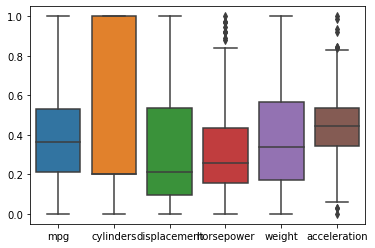

In [49]:
df_pandas[quan_atrib] = preprocessing.MinMaxScaler().fit_transform(df_pandas[quan_atrib].values.astype(float))
sns.boxplot(data = df_pandas[quan_atrib])

# 4 пункт
Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [50]:
categorical_columns = [c for c in df_pandas.columns if df_pandas[c].dtype.name == 'object']
numerical_columns   = [c for c in df_pandas.columns if df_pandas[c].dtype.name != 'object']
print (f"Категоиальные признаки: {categorical_columns}")
print (f"Числовые признаки: {numerical_columns}")

Категоиальные признаки: ['car name']
Числовые признаки: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']


In [51]:
df_pandas[categorical_columns].describe()

,car name
count,392
unique,301
top,amc matador
freq,5


In [ ]:
Замена не требуется поскольку большинство значений является уникальным

# 5 пункт
Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

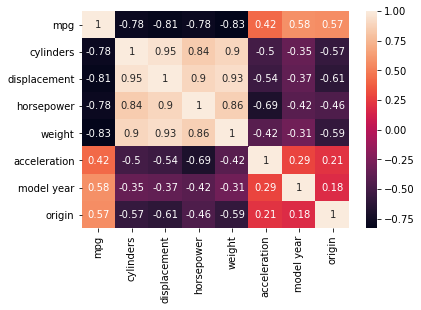

In [52]:
df_corr = df_pandas.corr()
sns.heatmap(df_corr, annot = True)

# 6 пункт
Заполните пропущенные значения в данных

In [53]:
df_pandas.count()

mpg             392
cylinders       392
displacement    392
horsepower      392
weight          392
acceleration    392
model year      392
origin          392
car name        392
dtype: int64

In [ ]:
Пропущенных значений нет

# 7 пункт
Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

<b>1 - линейная регрессия, LASSO регуляризатор </b>

In [60]:
df_pandas = df_pandas.drop(['car name'], axis=1)
x, y = df_pandas.drop(['mpg'], axis=1), df_pandas['mpg']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
pred_reg = lasso.predict(X = x_test)
print(pred_reg[:15] - y_test[:15])

220     0.546449
245    -7.110041
134    -1.853553
147     2.042629
390     2.372692
33     -0.018238
266     3.271503
226     2.395594
263     0.226060
327   -10.362491
188     0.794385
273     7.386606
9      -2.168871
236    -3.975870
211     3.041429
Name: mpg, dtype: float64


In [63]:
P, p_value_P = pearsonr(pred_reg, y_test)
S, p_value_S = spearmanr(pred_reg, y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.8872739063580509 p_value: 8.62130670580022e-41
Spearmen correlation: 0.9225354231231032 p_value: 8.626716705901623e-50


<b>2 - линейная регрессия, RIDGE регуляризатор</b>

In [68]:
reg = Ridge()
params = {'alpha': np.arange(0, 3, 0.05)}
reg_grid = GridSearchCV(reg, params)
reg_grid.fit(x_train, y_train)
best_alpha = reg_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 2.95


In [70]:
reg = Ridge(alpha=best_alpha)
reg.fit(x_train,y_train)
pred_reg = reg.predict(x_test)
print(pred_reg[:15] - y_test[:15])

220     0.467173
245    -6.842606
134    -1.983891
147     2.232835
390     2.276306
33     -0.204959
266     3.515505
226     2.496571
263     0.198663
327   -10.219441
188     0.830694
273     7.273771
9      -2.138691
236    -4.252300
211     3.052555
Name: mpg, dtype: float64


In [72]:
P, p_value_P = pearsonr(pred_reg, y_test)
S, p_value_S = spearmanr(pred_reg, y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearman correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.8882284639669051 p_value: 5.415584245449902e-41
Spearman correlation: 0.9204052444919737 p_value: 3.9103885505475386e-49
